In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [13]:
#accessing the file through my github account
url = "https://raw.githubusercontent.com/AndresLonghorn/Real-Estate-Investment-Trust/main/kc_house_data.csv"
df = pd.read_csv(url)

## Display the data types of each column using the attribute dtypes

In [14]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Drop the columns "id" and "Unnamed: 0" 

In [15]:
#taking out the first column from the dataframe
df = pd.read_csv(url, index_col=0)
df.head()

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        1050   
1954400510      8080     1.0           0     0          3      8        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

## Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame. 

In [16]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [93]:
# A monthly rental income assuming that the monthly rent is 8% of the property price
df['monthly_rent_estimate'] = df['price'] * 0.008
df['annual_rent'] = df['monthly_rent_estimate'] * 12
df['rental_yield_percent'] = (df['annual_rent'] / df['price']) * 100

# View average yield
print("Average Estimated Rental Rev: {:.2f}%".format(df['rental_yield_percent'].mean()))


Average Estimated Rental Rev: 9.60%


In [28]:
#checking for correlation to price
mod_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
             'waterfront','condition', 'grade', 'sqft_above', 'sqft_basement',
             'yr_built', 'yr_renovated','zipcode', 'sqft_living15','sqft_lot15']]


corr_to_price = mod_df.corr()['price'].sort_values(ascending=False)
corr_to_price = (corr_to_price*100).round(2)
print(corr_to_price)

price            100.00
sqft_living       70.20
grade             66.74
sqft_above        60.56
sqft_living15     58.54
bathrooms         52.51
sqft_basement     32.38
bedrooms          30.83
waterfront        26.64
floors            25.68
yr_renovated      12.64
sqft_lot           8.97
sqft_lot15         8.24
yr_built           5.40
condition          3.64
zipcode           -5.32
Name: price, dtype: float64


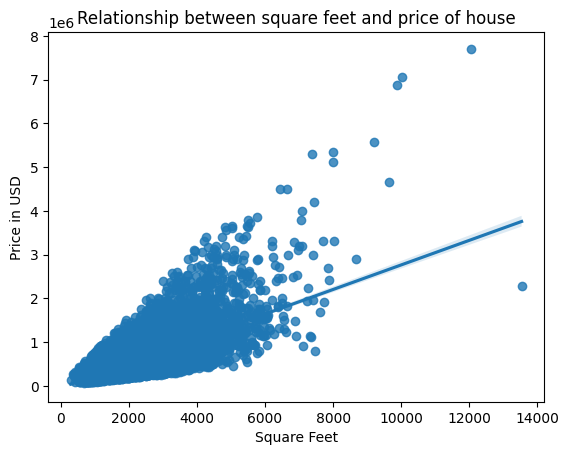

In [35]:
sns.regplot(x='sqft_living',y='price',data=mod_df)
plt.title('Relationship between square feet and price of house')
plt.xlabel('Square Feet')
plt.ylabel('Price in USD')
plt.show()

## Correlation doesn't always mean causation. Therefore, better returns on real estate investments are driven by the grade, square feet living space. This data should not recommend all types of real estate investors the same blue print to earn profits, rather confirming prior assumtions an investor might have. 

### A loan officer or investor might want to focus on high-grade, large sqft_living properties in desirable locations. Waterfront properties, though rare, offer high returns. Renovated homes may offer better value appreciation. Avoid overpaying for extra bedrooms or lot size—these have weaker correlations with price.

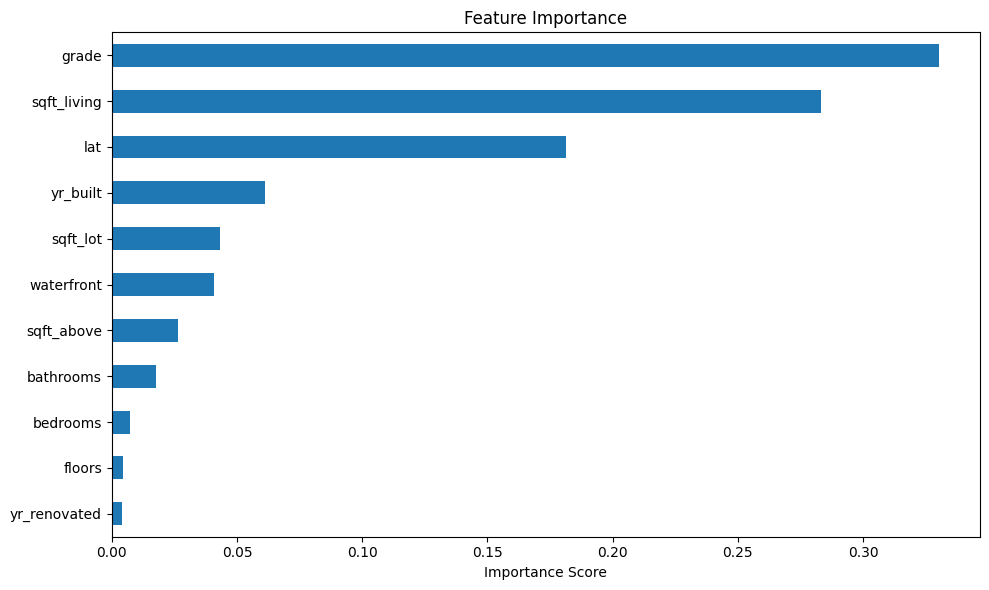

In [79]:
from sklearn.ensemble import RandomForestRegressor
# Train model
model = RandomForestRegressor()
model.fit(features_X, features_y)

# Plot feature importance
importance = pd.Series(model.feature_importances_, index=features_X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## A linear regression can help explain around 58% of price variance

In [59]:
from sklearn.linear_model import LinearRegression

X = mod_df[['sqft_living', 'grade','sqft_above', 'sqft_living15', 'bathrooms','sqft_basement','bedrooms','waterfront','floors']] 
y = mod_df['price']         

linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)


LinearRegression()

In [60]:
from sklearn.metrics import r2_score
y_predict = linear_regression_model.predict(X)
r2 = r2_score(y,y_predict)
print(f'R Square Score: {r2:.4f}')

R Square Score: 0.5843


## The most optimal model for predicting real estate prices is a random forest regression model. 
### Outliers in housing prices challenge linear predictability. Random forest can handle categorical, continuous variables, non-linear relationships.

In [97]:
# Random Forest
rf = RandomForestRegressor().fit(X_train, y_train)
print("Random Forest R²:", r2_score(y_test, rf.predict(X_test)))

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
print("Linear Regression R²:", r2_score(y_test, lr.predict(X_test)))

# SVR with scaling to reduce the bias with regards to high value features that we included in our training data (square feet & price).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR().fit(X_train_scaled, y_train)
print("SVR R²:", r2_score(y_test, svr.predict(X_test_scaled)))

Random Forest R²: 0.7983465185350714
Linear Regression R²: 0.6823622585994946
SVR R²: -0.0625061880282829


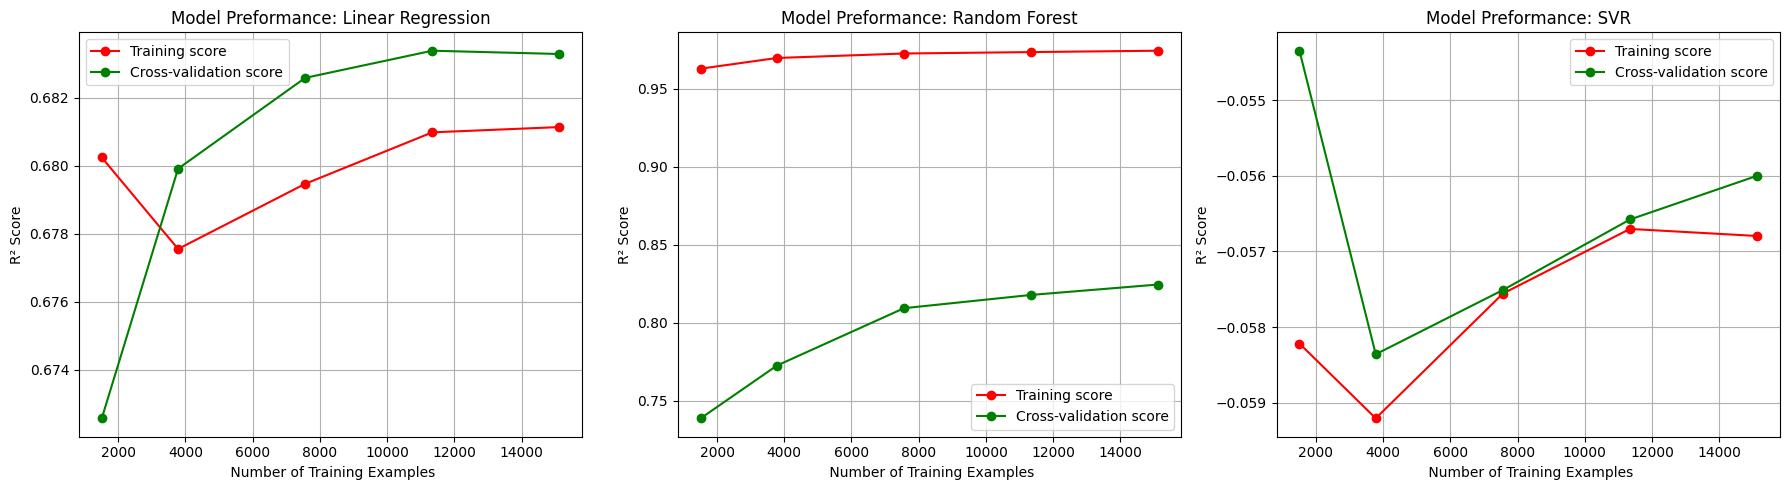

In [106]:
from sklearn.model_selection import learning_curve, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    
    # Scale features for SVR
    X_input = features_X if name != "SVR" else StandardScaler().fit_transform(features_X)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_input, features_y, cv=cv, scoring='r2',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1.0]
    )
    
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
    plt.title(f"Model Preformance: {name}")
    plt.xlabel(" Number of Training Examples")
    plt.ylabel("R² Score")
    plt.legend(loc="best")
    plt.grid(True)

plt.tight_layout()
plt.show()

### The large dataset aids machine learning models to preform well, 21.6K rows reduces overfitting, learn complex linear and non-linear patterns, especially for random forest and SVR algorithms. In other words, improved stability in predictions. 